### Create MNIST Dataset with class implementation and with ImageFolder

<b>Note:</b> you need to run data creating script

#### Start with our own class

In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

In [2]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
# Create our MNIST dataset implementation
class MNISTDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.len_dataset = 0
        self.data_list = []

        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = sorted(dir_list)
                # dict with class names and they positions in one_hot vector
                self.class_to_index = {
                    cls_name: i for i, cls_name in enumerate(self.classes)
                }
                continue

            cls = path_dir.split('/')[-1]

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_index[cls]))

            self.len_dataset += len(file_list)

    # always implement length of dataset here
    def __len__(self):
        return self.len_dataset

    # data with they class
    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = np.array(Image.open(file_path))

        if self.transform is not None:
            sample = self.transform(sample)
        # return sample and it's class position in one_hot vector
        return sample, target

In [4]:
# create datasets
path = os.path.join(os.getcwd(), 'mnist')
train_data = MNISTDataset(os.path.join(path, 'training'))
test_data = MNISTDataset(os.path.join(path, 'testing'))

In [5]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [6]:
train_data.class_to_index

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

Class - class_2


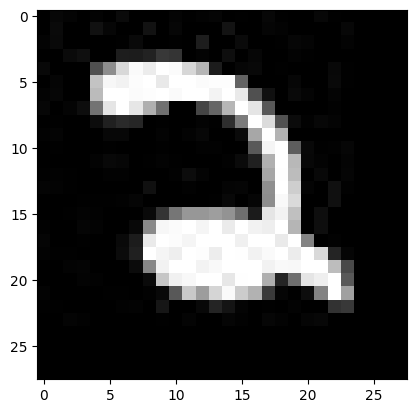

In [7]:
# check image and classes
img, one_hot_position = train_data[2564]

cls = train_data.classes[one_hot_position]
print(f'Class - {cls}')
plt.imshow(img, cmap='grey')

In [8]:
# do train-val split
train_data, val_data = random_split(train_data, [0.8, 0.2])

In [9]:
# do batches
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

#### Do the same with ImageFolder, provided in torch

<b>Note:</b><i>ImageFolder</i> fits only for presented data organisation(check and run data creating script)

In [10]:
train_data = ImageFolder(os.path.join(path, 'training'))
test_data = ImageFolder(os.path.join(path, 'testing'))

In [11]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [12]:
train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

Class - class_0


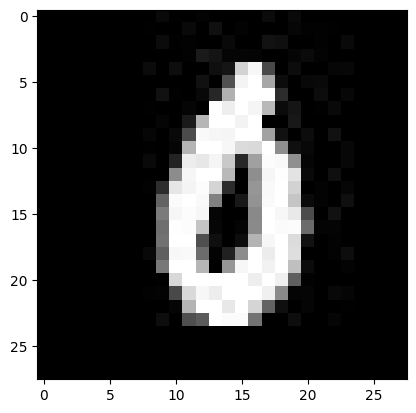

In [13]:
# check image and classes
img, one_hot_position = train_data[2564]

cls = train_data.classes[one_hot_position]
print(f'Class - {cls}')
plt.imshow(img, cmap='grey')

In [14]:
# and also split the data
train_data, val_data = random_split(train_data, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

#### Result is the same in both ways!